# Segmentación de Figuras

- Color
    <img src='Colors.png' />
- Forma  
    <img src='form.png' />

## Importar  librerias 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters

### Lectura de archivo de imágenes 

In [2]:
Blue=os.path.join("images/Azul.png")
Black=os.path.join("images/negro.png")
Green=os.path.join("images/verde.png")

In [3]:
Bl = Image.open(Blue)
Bk = Image.open(Black)
Gn = Image.open(Green)

## Analizamos los datos 

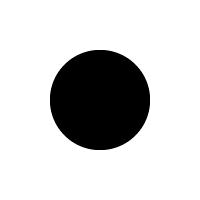

In [4]:
Bk

In [5]:
# Transformando a un arreglo 
np.array(Bk).shape

(200, 200, 4)

In [6]:
# Verificando los canales 
Bk.getbands()

('R', 'G', 'B', 'A')

In [7]:
# Removiendo el canal alpha 
ABk=np.array(Bk)[:,:,0:3]
ABl=np.array(Bl)[:,:,0:3]
AGn=np.array(Gn)[:,:,0:3]

In [8]:
# Verificando la forma
ABk.shape

(200, 200, 3)

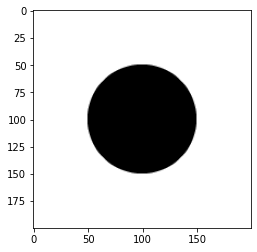

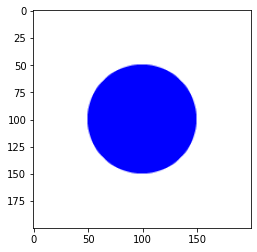

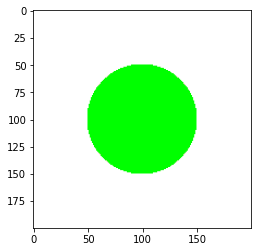

In [9]:
# Graficando las imágenes 
plt.imshow(ABk)
plt.show()
plt.imshow(ABl)
plt.show()
plt.imshow(AGn)
plt.show()

# Detectando el color por valor del pixel 
Extrayendo las características 

In [10]:
def rgb2hsv(color):
    max_c=np.argmax(color)
    min_c=np.argmin(color)
    color=color/255
    if min_c==max_c:
        hue=0
    elif max_c==0: #si el valor máximo es azul
        hue=(color[1]-color[2])/(color[max_c]-color[min_c])
    elif max_c==1:
        hue=2+(color[2]-color[0])/(color[max_c]-color[min_c])
    else:
        hue=4+(color[0]-color[1])/(color[max_c]-color[min_c])
    hue=hue*60
    if hue<0:
        hue+=360
    
    if color[max_c]==0:
        sat=0
    else:
        sat=(color[max_c]-color[min_c])/color[max_c]*100
    val=color[max_c]*100
    return np.array([hue,sat,val],dtype=np.uint8)

In [11]:
print(rgb2hsv(ABk[100,100]))
print(rgb2hsv(ABl[100,100]))
print(rgb2hsv(AGn[100,100]))

[0 0 0]
[240 100 100]
[120 100 100]


 **nota**: si los valores son tan distintivos no es necesario aplicar una red neuronal 

# Clasificador de color

In [12]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Preparando los datos 

Para este primer caso usaremos aprendizaje supervisado 
Los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- negro=1,0,0
- verde=0,1,0
- azul=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]



In [13]:
def Lector_de_imagenes(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        name=img
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            t_data=rgb2hsv(np.array(img,dtype=np.uint8)[:,:,0:3][100,100])
            Train_data.append(t_data) #obtiene solo un pixel centroide para el color
        except :
            print("file error: "+img)
        print(f'{name} - {imgtag}->{t_data}')
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [14]:
X_train,y_train=Lector_de_imagenes("images/colores/Train","Train_color.json")

fig1.png - [0, 0, 1]->[240 100  40]
fig10.png - [0, 1, 0]->[120 100  86]
fig11.png - [0, 1, 0]->[120 100  60]
fig12.png - [0, 1, 0]->[132 100 100]
fig13.png - [1, 0, 0]->[0 0 0]
fig14.png - [1, 0, 0]->[ 0  0 20]
fig15.png - [1, 0, 0]->[ 0  0 11]
fig16.png - [1, 0, 0]->[0 0 6]
fig17.png - [1, 0, 0]->[ 0  0 17]
fig18.png - [1, 0, 0]->[105  22   7]
fig2.png - [0, 0, 1]->[240 100  60]
fig3.png - [0, 0, 1]->[225 100  80]
fig4.png - [0, 0, 1]->[228 100 100]
fig5.png - [0, 0, 1]->[220 100  60]
fig6.png - [0, 0, 1]->[204 100 100]
fig7.png - [0, 1, 0]->[120 100 100]
fig8.png - [0, 1, 0]->[120  83 100]
fig9.png - [0, 1, 0]->[120 100  53]


In [15]:
X_test,y_test=Lector_de_imagenes("images/colores/Test","Test_color.json")

Test1.png - [0, 0, 1]->[228 100 100]
Test2.png - [0, 0, 1]->[199 100  60]
Test3.png - [0, 0, 1]->[210 100  80]
Test4.png - [0, 1, 0]->[120 100  80]
Test5.png - [0, 1, 0]->[120 100 100]
Test6.png - [0, 1, 0]->[132 100 100]
Test7.png - [1, 0, 0]->[ 0  0 17]
Test8.png - [1, 0, 0]->[0 0 0]
Test9.png - [1, 0, 0]->[69 32 23]


In [16]:
X_train.shape

(18, 3)

In [17]:
X_train

array([[240, 100,  40],
       [120, 100,  86],
       [120, 100,  60],
       [132, 100, 100],
       [  0,   0,   0],
       [  0,   0,  20],
       [  0,   0,  11],
       [  0,   0,   6],
       [  0,   0,  17],
       [105,  22,   7],
       [240, 100,  60],
       [225, 100,  80],
       [228, 100, 100],
       [220, 100,  60],
       [204, 100, 100],
       [120, 100, 100],
       [120,  83, 100],
       [120, 100,  53]], dtype=uint8)

In [18]:
y_train

[[0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0]]

## Ajustar Parámetros del modelo

In [19]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(10, 10), random_state=1)

## Ajuste del modelo

In [20]:
clfcolor.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), random_state=1,
              solver='lbfgs')

In [21]:
pred = clfcolor.predict(X_test)

In [22]:
pred

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

## Evaluar al modelo 

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [25]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)

In [26]:
predclass

[2, 2, 2, 1, 1, 1, 0, 0, 2]

In [27]:
yclass

[2, 2, 2, 1, 1, 1, 0, 0, 0]

In [28]:
print(accuracy_score(predclass,yclass)) 

0.8888888888888888


In [29]:
print(confusion_matrix(predclass,yclass))


[[2 0 0]
 [0 3 0]
 [1 0 3]]


## Clasificador de forma 
### Lectura de archivo de imágenes 

In [30]:
CR=os.path.join("images/circulo.png")
CD=os.path.join("images/cuadro.png")
TR=os.path.join("images/triangulo.png")

In [31]:
Cir = Image.open(CR).convert('L') #La L especifica un solo canal, en este caso, escala de grises
Cud = Image.open(CD).convert('L')
Tri = Image.open(TR).convert('L')

In [32]:
# Convertir a arreglo
ACR=np.array(Cir)
ACD=np.array(Cud)
ATR=np.array(Tri)

In [33]:
ACD.shape

(200, 200)

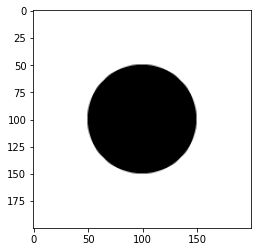

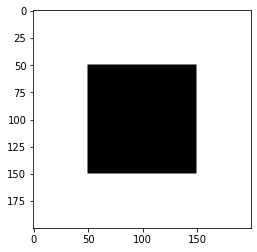

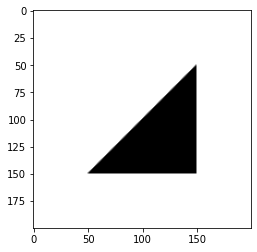

In [34]:
# Graficando las imágenes 
plt.imshow(ACR,cmap='gray')
plt.show()
plt.imshow(ACD,cmap='gray')
plt.show()
plt.imshow(ATR,cmap='gray')
plt.show()

## Determinando las características adecuadas 
¿Comó podemos  describir numéricamente la forma de las figuras?

### Usando el área de la figura como descriptor  

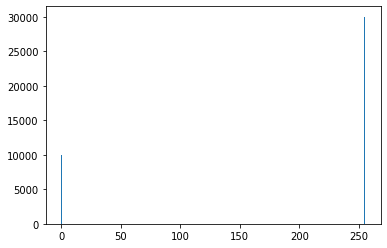

Área del cuadro en pixeles
10000


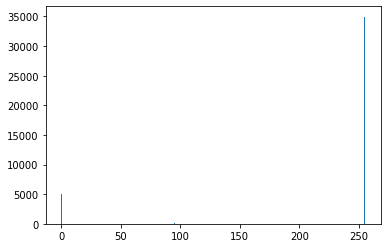

Área del Triángulo en pixeles
4950


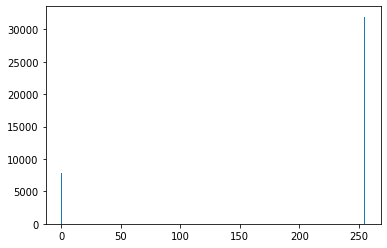

Área del círculo en pixeles
7772


In [35]:
# Posibles valores de intensidad en una imagen
x=np.arange(0,256)
# Cálculo del área del cuadrado 
hist,centers=ski.exposure.histogram(ACD)
plt.bar(x, hist)
plt.show()
print("Área del cuadro en pixeles")
# Cálculo del área del triángulo 
print(hist[0])
hist,centers=ski.exposure.histogram(ATR)
plt.bar(x, hist)
plt.show()
print("Área del Triángulo en pixeles")
# Cálculo del área del círculo 
print(hist[0])
hist,centers=ski.exposure.histogram(ACR)
plt.bar(x, hist)
plt.show()
print("Área del círculo en pixeles")
print(hist[0])

Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 

Limitantes de usar el área como descriptor 
- Es susceptible a los cambios en el tamaño  
- Es posible que el área de dos tipos de figuras diferentes se intersecten 

## Usando el número de  esquinas como descriptor 

In [36]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

In [37]:
NCD=len(corner_peaks(corner_harris(ACD), min_distance=5))
NCR=len(corner_peaks(corner_harris(ACR), min_distance=5))
NTR=len(corner_peaks(corner_harris(ATR), min_distance=5))
print("Número de esquinas del cuadrado {}".format(NCD))
print("Número de esquinas del círculo {}".format(NCR))
print("Número de esquinas del triángulo  {}".format(NTR))

Número de esquinas del cuadrado 4
Número de esquinas del círculo 0
Número de esquinas del triángulo  3


<ipython-input-37-e93b4e6e7180>:1: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  NCD=len(corner_peaks(corner_harris(ACD), min_distance=5))
<ipython-input-37-e93b4e6e7180>:2: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  NCR=len(corner_peaks(corner_harris(ACR), min_distance=5))
<ipython-input-37-e93b4e6e7180>:3: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to Non

Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 
- Es invariante a cambios en el tamaño

Limitantes de usar el área como descriptor 
- No permite diferenciar entre figuras con el mismo número de esquinas  cómo cuadrados y rectángulos
- El metodo de extraccion de caracteristicas falla en casos en donde las figuras tienen bordes irregulares como las figuras trazadas  a mano 

<img src='cuadroMT.png' width="40%" height="40%" />

In [38]:
#Contra Ejemplo
CDD=os.path.join("images/CuadroMT.png")
CadD = Image.open(CDD).convert('L')
ACDD=np.array(CadD)
len(corner_peaks(corner_harris(ACDD), min_distance=5))

<ipython-input-38-d884c6cc3834>:5: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  len(corner_peaks(corner_harris(ACDD), min_distance=5))


12

### Usando un descriptor invariante 

El problema de identificación de formas se ha estudiado durante mucho tiempo, como resultado se han propuesto metodologías de extracción de características invariantes a rotación, traslación y escalamiento. Estas características son los momentos invariables de Hu.

Para mayor detalle favor de consultar el capítulo de extracción de características del libro Gonzalez & Woods, Digital Image Processing

http://www.sc.ehu.es/ccwgrrom/transparencias/pdf-vision-1-transparencias/capitulo-8.pdf

255


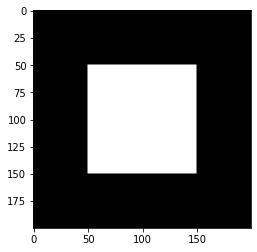

In [39]:
#  Proceso para aplicar los momentos de hu
# Invertir los colores de la imagen 
ICD=ski.util.invert(ACD)
print(ICD[100,100])
plt.imshow(ICD,cmap='gray')
plt.show()

In [40]:
def umbral_image(img,umbral=25):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>umbral:
                z[i,j]=250
    return z

<ipython-input-41-11fb07f56f8b>:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(ski.color.label2rgb(label_image))


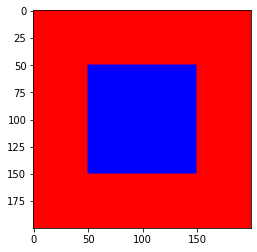

In [41]:
# Binarizar imagen 
CD=umbral_image(ICD)
label_image=ski.measure.label(ICD)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()


In [42]:
ICD[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [43]:
label_image[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [44]:
# Calcular las propiedades de la figura
regions = ski.measure.regionprops(label_image)
print(f'Numero de regiones: {len(regions)}')
for prop in regions[0]:
    print(prop, regions[0][prop])

Numero de regiones: 1
area 10000
bbox (50, 50, 150, 150)
bbox_area 10000
centroid (99.5, 99.5)
convex_area 10000
convex_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
coords [[ 50  50]
 [ 50  51]
 [ 50  52]
 ...
 [149 147]
 [149 148]
 [149 149]]
eccentricity 0.0
equivalent_diameter 112.83791670955127
euler_number 1
extent 1.0
filled_area 10000
filled_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True 

In [45]:
# Obtener la propiedad de interés
momento =regions[0].moments_hu

In [46]:
momento

array([0.16665, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ])

In [47]:
# Creando una función para extraer los momentos de hu 
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

In [48]:
print("Momentos del cuadrado {}".format(hu_Characteristics(ACD)))
print("Momentos del círculo {}".format(hu_Characteristics(ACR)))
print("Momentos del triángulo   {}".format(hu_Characteristics(ATR)))

Momentos del cuadrado [0.16665 0.      0.      0.      0.      0.      0.     ]
Momentos del círculo [0.15915634 0.         0.         0.         0.         0.
 0.        ]
Momentos del triángulo   [ 2.22178218e-01  1.23407901e-02  5.48493137e-03  2.19397255e-04
 -2.40675777e-07 -2.43726455e-05  0.00000000e+00]


## Preparando los datos

Para este primer caso usaremos aprendizaje supervisado,los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- Cuadro=1,0,0
- Triángulo=0,1,0
- Círculo=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]

In [49]:
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [50]:
X_train,y_train=Lector_forma("images/Forma/Train","Train_forma.json")

In [51]:
X_test,y_test=Lector_forma("images/Forma/Test","Test_forma.json")

In [52]:
X_train.shape

(12, 7)

In [53]:
X_test.shape

(6, 7)

In [54]:
X_train

array([[ 2.59405326e-01,  3.09133916e-02,  6.13880006e-03,
         3.98169636e-04, -5.95128918e-07, -6.77211927e-05,
         1.82581552e-07],
       [ 2.02886444e-01,  4.33109840e-03,  4.77973530e-03,
         1.47320455e-04,  1.19870140e-07,  9.04763748e-06,
        -3.02258185e-08],
       [ 1.59365801e-01,  4.76775209e-05,  1.36881255e-06,
         7.57078859e-10, -7.09176749e-18, -2.02090145e-12,
        -2.33169616e-17],
       [ 1.66992852e-01,  1.15236999e-04,  1.27895756e-06,
         1.36204460e-07, -1.17570826e-14, -9.08052061e-10,
        -5.56189192e-14],
       [ 1.59223744e-01,  1.36265771e-05,  5.01660805e-07,
         1.21206297e-10,  9.93178395e-20,  1.21035462e-13,
         9.39900039e-19],
       [ 1.66719514e-01,  1.39508895e-05,  1.05831946e-06,
         1.17762518e-07, -2.37733945e-14,  2.04361853e-10,
         3.41057319e-14],
       [ 2.35452087e-01,  1.86965763e-02,  5.78921379e-03,
         4.93699889e-04,  4.27088289e-07,  1.67515892e-05,
         7.1710252

## Ajustar Parámetros del modelo

In [55]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-3,
                  hidden_layer_sizes=(10, 10), random_state=1)

## Ajuste del modelo

In [56]:
clforma.fit(X_train,y_train)

c:\users\daniel\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 10), random_state=1,
              solver='lbfgs')

In [57]:
pred = clforma.predict(X_test)

## Evaluar al modelo 

In [58]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)
print(predclass)
print(yclass)

[1, 2, 0, 1, 0, 2]
[1, 2, 0, 1, 2, 0]


In [59]:
print(accuracy_score(predclass,yclass)) 

0.6666666666666666


In [60]:
print(confusion_matrix(predclass,yclass))

[[1 0 1]
 [0 2 0]
 [1 0 1]]


# Implementar el modelo

In [61]:
import pickle

In [62]:
filename = 'clforma_model.sav'
with open(filename,'wb') as outfile:
    pickle.dump(clforma, outfile, pickle.HIGHEST_PROTOCOL)

In [63]:
with open(filename,'rb') as infile:
    loaded_model = pickle.load(infile)


In [64]:
load_predict=loaded_model.predict(X_test)

In [65]:
ClassDetector(load_predict)

[1, 2, 0, 1, 0, 2]

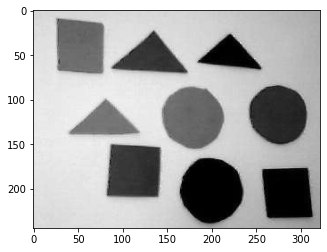

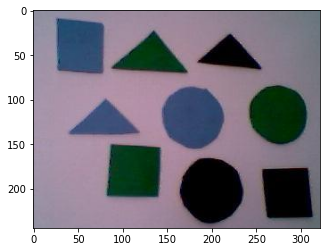

In [66]:
filename=os.path.join("foto (1).jpg")
im_gray_ = Image.open(filename).convert('L')
im_gray=np.array(im_gray_)

im_color = Image.open(filename)
im_color=np.array(im_color)

plt.imshow(im_gray,cmap='gray')
plt.show()
plt.imshow(im_color)
plt.show()

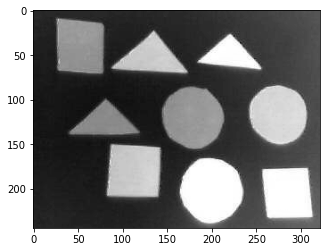

In [67]:
i_gray=ski.util.invert(im_gray)
plt.imshow(i_gray,cmap='gray')
plt.show()

In [68]:
def umbral_image(img,umbral=160):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]<umbral:
                z[i,j]=255
    return z

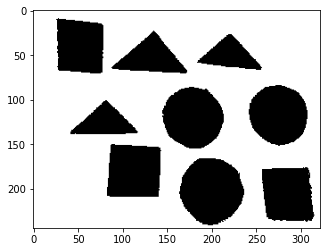

In [69]:
CD=umbral_image(i_gray,160)
plt.imshow(CD,cmap='gray')
plt.show()

In [70]:
#Para poder separar las figuras, usé una técnica de agrupamiento
from sklearn.cluster import DBSCAN
idx=np.where(CD==0)
points=np.array(idx).T
db = DBSCAN(eps=3, min_samples=10).fit(points)

labels = set(db.labels_)
if -1 in labels: labels.remove(-1)
print(labels)
n_clusters_ = len(set(labels)) 
n_clusters_

{0, 1, 2, 3, 4, 5, 6, 7, 8}


9

In [71]:
CD2=CD.copy()
CD2[idx]=db.labels_

Numero de regiones: 10


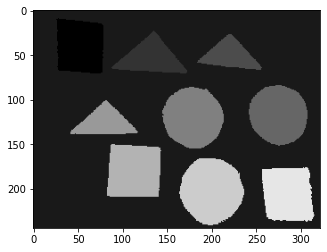

In [72]:

label_image=ski.measure.label(CD2)
regions = ski.measure.regionprops(label_image)
print(f'Numero de regiones: {len(regions)}')

plt.imshow(label_image,cmap='gray')
plt.show()

In [73]:
formas={
    0:'cuadrado',
    1:'triangulo',
    2:'circulo'
}

colores={
    0:'negro',
    1:'verde',
    2:'azul'
}

In [74]:
with open('Test_forma_foto.json') as data_file:    
         etiquetas = json.load(data_file)
with open('Test_color_foto.json') as data_file:    
         etiquetas_c = json.load(data_file)

A continuación recorté cada una de las formas para poder analizarlas por separado

Predicted shape: 0 -> cuadrado
Labeled shape: 0 -> cuadrado
Predicted color: 2 -> azul
Labeled color: 2 -> azul


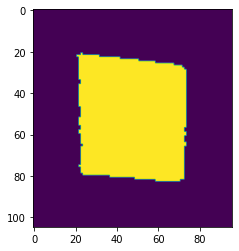

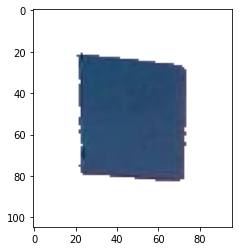

Predicted shape: 1 -> triangulo
Labeled shape: 1 -> triangulo
Predicted color: 1 -> verde
Labeled color: 1 -> verde


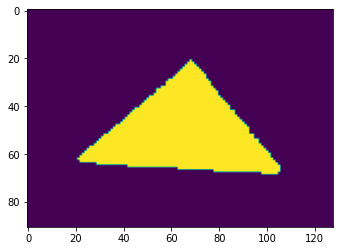

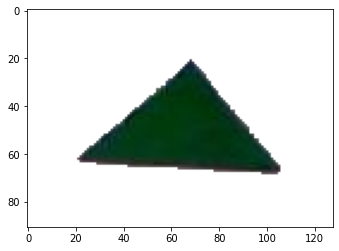

Predicted shape: 1 -> triangulo
Labeled shape: 1 -> triangulo
Predicted color: 1 -> verde
Labeled color: 0 -> negro


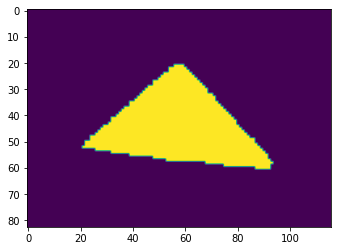

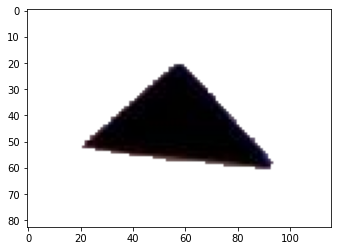

Predicted shape: 2 -> circulo
Labeled shape: 2 -> circulo
Predicted color: 1 -> verde
Labeled color: 1 -> verde


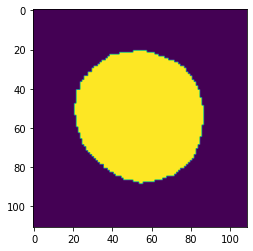

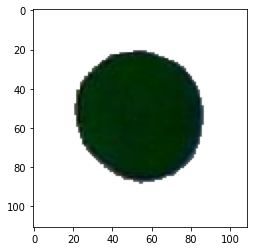

Predicted shape: 2 -> circulo
Labeled shape: 2 -> circulo
Predicted color: 0 -> negro
Labeled color: 2 -> azul


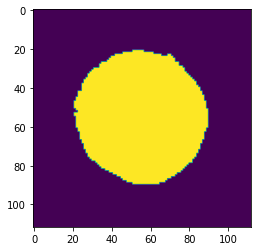

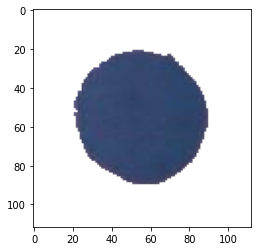

Predicted shape: 1 -> triangulo
Labeled shape: 1 -> triangulo
Predicted color: 0 -> negro
Labeled color: 2 -> azul


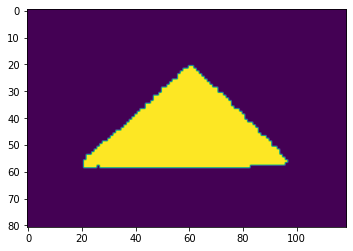

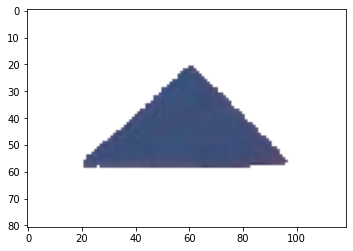

Predicted shape: 0 -> cuadrado
Labeled shape: 0 -> cuadrado
Predicted color: 1 -> verde
Labeled color: 1 -> verde


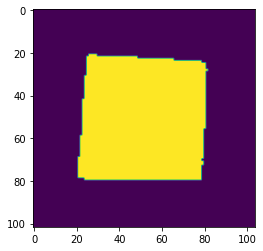

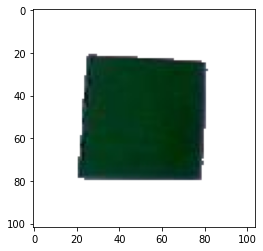

Predicted shape: 2 -> circulo
Labeled shape: 2 -> circulo
Predicted color: 0 -> negro
Labeled color: 0 -> negro


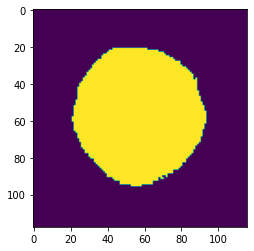

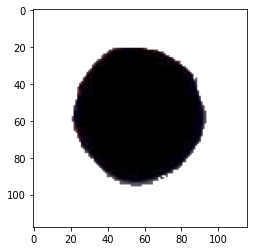

Predicted shape: 0 -> cuadrado
Labeled shape: 0 -> cuadrado
Predicted color: 0 -> negro
Labeled color: 0 -> negro


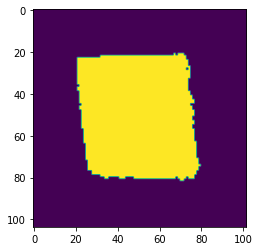

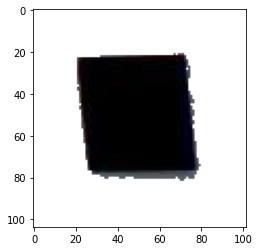

In [75]:
pred_shape_class=[]
pred_color_class=[]
y_shape_class=np.array(list(etiquetas.values()))
y_color_class=np.array(list(etiquetas_c.values()))
padding=20

for l in labels:
    idx=np.array(np.where(CD2==l))
    min_x=idx[0].min()
    min_y=idx[1].min()

    idx_0=idx[0]-min_x+padding+1
    idx_1=idx[1]-min_y+padding+1

    width=idx_0.max()+padding+3
    height=idx_1.max()+padding+3

    temp=np.zeros([width,height],dtype=np.uint8)
    temp_color=np.ones([width,height,3],dtype=np.uint8)*255
    temp[idx_0,idx_1]=255
    temp_color[idx_0,idx_1,:]=im_color[idx[0],idx[1],:3]
    
    
    label_image=ski.measure.label(temp)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu.reshape([1,-1])
    
    
    t_color=rgb2hsv(temp_color[width//2,height//2]).reshape([1,-1])
    
    
    pred_color= ClassDetector(clfcolor.predict(t_color))
    pred_shape = ClassDetector(clforma.predict(momento))
    
    print(f'Predicted shape: {pred_shape[0]} -> {formas[pred_shape[0]]}')
    print(f'Labeled shape: {etiquetas[str(l)]} -> {formas[etiquetas[str(l)]]}')
    
    print(f'Predicted color: {pred_color[0]} -> {colores[pred_color[0]]}')
    print(f'Labeled color: {etiquetas_c[str(l)]} -> {colores[etiquetas_c[str(l)]]}')
    
    pred_shape_class.append(pred_shape[0])
    pred_color_class.append(pred_color[0])
    
    plt.imshow(temp)
    plt.show()
    plt.imshow(temp_color)
    plt.show()
pred_shape_class=np.array(pred_shape_class)
pred_color_class=np.array(pred_color_class)

In [76]:
print(accuracy_score(pred_shape_class,y_shape_class))
print(confusion_matrix(pred_shape_class,y_shape_class))

1.0
[[3 0 0]
 [0 3 0]
 [0 0 3]]


In [77]:
print(accuracy_score(pred_color_class,y_color_class))
print(confusion_matrix(pred_color_class,y_color_class))

0.6666666666666666
[[2 0 2]
 [1 3 0]
 [0 0 1]]
